<a href="https://colab.research.google.com/github/JoseLuisBarba/deepLearning/blob/main/multiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**
In this notebook we'll bouild a ANN multi-class classification model using 'MNIST' dataset.


#**About the data**
MNIST (Modified National Institute of Standards and Technology database) is a large database of 70,000 handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST (National Institute of Standards and Technology). The objective here is to build a model that would recognize the correct digit that the given image is representing.





#**Objective**
In this notebook we'll classify handwritten digits using a simple neural network which has only input (one-dimensional array) and output layers. We will then add a hidden layer and see how the performance of the model improves.



#**Loading libraries**

In [188]:
import tensorflow as tf #deep learning library
import numpy as np #we use it for matrix operations
import matplotlib.pyplot as plt #we use it for visualization
%matplotlib inline

#**Loading Data**
Let's load the data.

In [189]:
from tensorflow.keras.datasets.mnist import load_data
(XTrain, yTrain), (XTest, yTest) = load_data()

In [190]:
print(f'There\'re {len(XTrain)} images in the training dataset.') 
print(f'There\'re {len(XTest)} images in the test dataset.')

There're 60000 images in the training dataset.
There're 10000 images in the test dataset.


In [191]:
#checking the shape of imagen
print(XTrain[0].shape)
#Each imagen in the data set is of shape 28x28 pixels

(28, 28)


In [192]:
#We show the first point of training dataset.
XTrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

There's a function in matplotlib that helps you to display the image of the array of numbers.

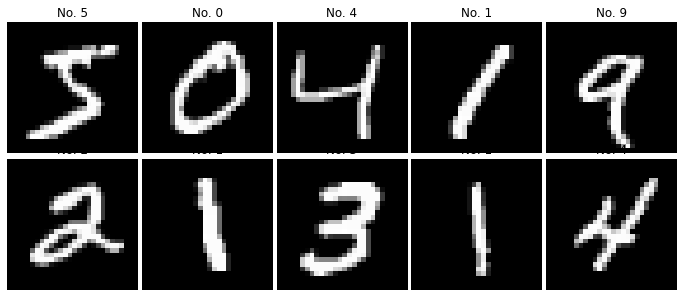

In [193]:
#To view the images
numRows, numCols = 2, 5
f, ax = plt.subplots(numRows, numCols, 
                     figsize=(12,5),
                     gridspec_kw={
                        'wspace':0.03, 
                        'hspace':0.01
                     },
                     squeeze=True)
for row in range(numRows):
  for col in range(numCols):
    imageIndex = row * 5 + col
    ax[row, col].axis("off")
    ax[row, col].imshow(XTrain[imageIndex], cmap='gray')
    ax[row, col].set_title(f'No. {yTrain[imageIndex]}')
plt.show()
plt.close()

#**Data Preprocessing**
##**Normalize data**
Let's normalize our data (i.e. both X_train and X_test). We change the range of pixel intensity values to the range 0 to 1 (value / max value).

In [194]:
XTrain = XTrain/float(255.0)
XTest = XTest/float(255.0) # 0 - 255 is RGB scale

In [195]:
XTrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [196]:
XTest[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

##**Flatten data**
We convert a 2 (2-array) data to 1 dimensional (one-array) each example.

In [197]:
n , row, col = XTrain.shape
print(f'({n}, {row} x {col})') #3-array

(60000, 28 x 28)


In [200]:
# converting 2-array  to 1-array
XTrainFlattened = XTrain.reshape(len(XTrain), row*col) 
XTestFlattened = XTest.reshape(len(XTest), row*col)

In [201]:
#Now if you check the shape of your data, it should be 2-array.

print(XTrainFlattened, XTrainFlattened.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (60000, 784)


A sample example showing the conversion 3-array to 2-array
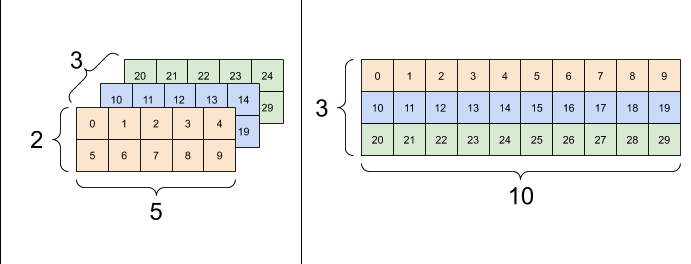

#**Building Models**
Very simple neural network with no hidden layers
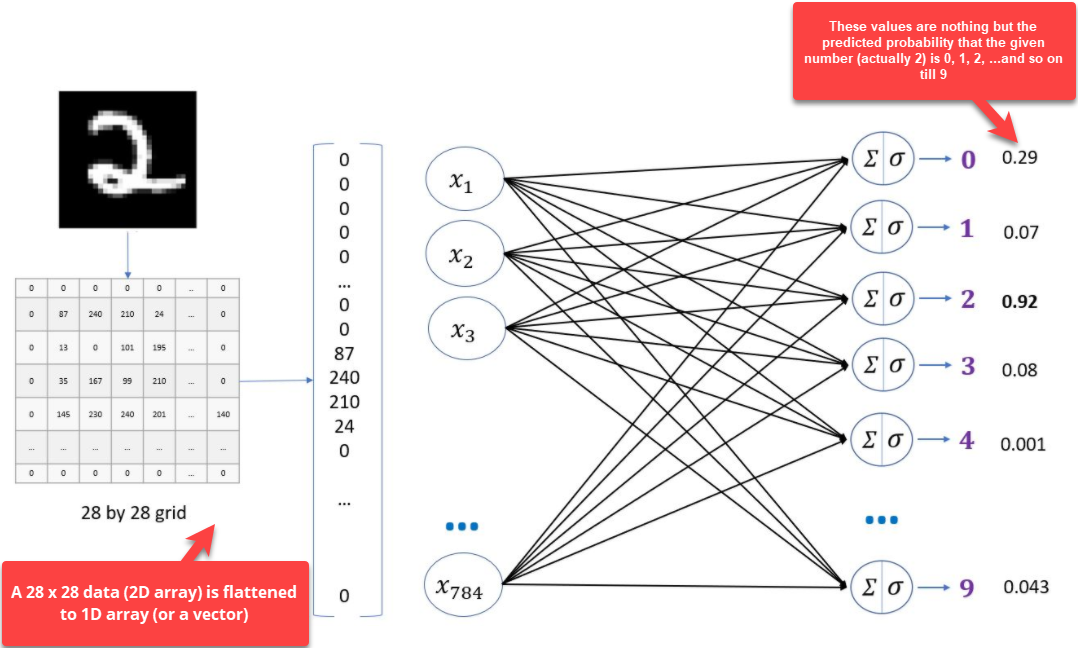

##**Define the model**

Sequential model:

In [202]:
#Defining the model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(10,input_shape=(28*28,), activation='softmax'), 
    ], name='ANN01'
)


In [203]:
model.summary()

Model: "ANN01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Compile the model:

In [204]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )



*   **adam:** is an optimization algorithm which is faster than Stochastic Gradient Descent. 
*   **sparse_categorical_crossentropy** is a loss function similar to **binary_crossentropy**, the only difference is that if the target variable is binary we use binary_crossentropy but if your target values are normal integers more then two, use sparse categorical crossentropy.
*  The metrics used to evaluate the model is **accuracy**. Accuracy calculates how often the predictions calculated by the model are correct.



##**Fit the model**

In [205]:
model.fit(XTrainFlattened, yTrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4732 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2840 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9259


In [206]:
#Evaluate the model on unseen data XTestFlattened
model.evaluate(XTestFlattened, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2693 - accuracy: 0.9263


[0.26928624510765076, 0.9262999892234802]

The performance of the model on very simple model with no hidden layer is 92.63%. It isn't Bad!

In [215]:
#Predict for the XTest
yPredicted = model.predict(XTestFlattened)
print(yPredicted[0])
print(f'Prediction: {np.argmax(yPredicted[0])}')
print(f'Real value: {yTest[0]}')

313/313 [==============================] - 0s 1ms/step
[6.8520590e-06 6.7981225e-11 1.1371395e-05 3.2022048e-03 3.1363041e-07
 2.3785749e-05 2.5320457e-10 9.9649405e-01 1.2614121e-05 2.4877340e-04]
Prediction: 7
Real value: 7


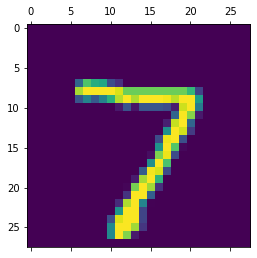

In [216]:
plt.matshow(XTest[0])

#**Building Neural Network Model Using hidden layer**


In [219]:
# Defining the model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(300, input_shape=(784,), activation='relu'),
      tf.keras.layers.Dense(100, input_shape=(300,), activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax'),
    ], name='DNN01')

In [220]:
model.summary()

Model: "DNN01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [221]:
# We are compiling the model
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
    )

In [223]:
# Fit the model
model.fit(XTrainFlattened, yTrain, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2730 - accuracy: 0.9213
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1018 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0351 - accuracy: 0.9893


In [224]:
# We Evaluated the model
model.evaluate(XTestFlattened,yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9780


[0.07069337368011475, 0.9779999852180481]

The performance of the model with hidden layers is 97.80.63%. It's GOOD!

#**Saving and loading the model**

In [227]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 


#**Summary**
1. We learned why we need to normalize and flatten the data.
2. We observed the performance of very simple neural network with no hidden layer and that of with one hidden layer with 100 hidden neurons. 
3. The performance of later model was better than earlier

#**Exercises**
Try different optimizers and losses in the above models and check the performance of the models.
1. Different losses that can be used
2.  Different optimizers that can be used

##**1. Different losses that can be used**

###**1.1. losses.sparse_categorical_crossentropy**

In [228]:
# Defining the model01
model1 = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(300, input_shape=(784,), activation='relu'),
      tf.keras.layers.Dense(100, input_shape=(300,), activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax'),
    ], name='DNN02')

In [234]:
# We are compiling the model
model1.compile(
      optimizer='adam',
      loss=tf.losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
    )

In [235]:
model1.fit(XTrainFlattened, yTrain, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4443 - accuracy: 0.8579
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1191 - accuracy: 0.9642
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0786 - accuracy: 0.9766
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0406 - accuracy: 0.9876


In [236]:
# We Evaluated the model
model1.evaluate(XTestFlattened,yTest)

313/313 [==============================] - 2s 6ms/step - loss: 0.0663 - accuracy: 0.9779


[0.06628242880105972, 0.9779000282287598]

In [237]:
# saving the model
save_dir = "/results/"
model_name = 'mnistModel1.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/mnistModel1.h5 


###**1.2 losses.poisson**

In [239]:
# Defining the model02
model2 = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(300, input_shape=(784,), activation='relu'),
      tf.keras.layers.Dense(100, input_shape=(300,), activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax'),
    ], name='DNN03')

In [240]:
# We are compiling the model
model2.compile(
      optimizer='adam',
      loss=tf.losses.poisson ,
      metrics=['accuracy']
    )

In [241]:
model2.fit(XTrainFlattened, yTrain, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 10.3574 - accuracy: 0.1077
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 10.3556 - accuracy: 0.1032
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 10.3556 - accuracy: 0.0994
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 10.3556 - accuracy: 0.1023
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 10.3556 - accuracy: 0.1019


###**1.3 losses.categorical_Hinge**

In [255]:
# Defining the model03
model3 = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(300, input_shape=(784,), activation='relu'),
      tf.keras.layers.Dense(100, input_shape=(300,), activation='relu'),
      tf.keras.layers.Dense(10, input_shape=(100,), activation='softmax'),
    ], name='DNN03')

In [266]:
# We are compiling the model
model3.compile(
      optimizer='adam',
      loss=tf.losses.categorical_hinge,
      metrics=['accuracy']
    )

In [269]:
model3.fit(XTrainFlattened, yTrain, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1086 - accuracy: 0.6255
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1086 - accuracy: 0.6245
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1086 - accuracy: 0.6223
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1086 - accuracy: 0.6198
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1086 - accuracy: 0.6162


##**2. Different optimizers that can be used**

In [270]:
# Defining the model01
model4 = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(300, input_shape=(784,), activation='relu'),
      tf.keras.layers.Dense(100, input_shape=(300,), activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax'),
    ], name='DNN04')

In [272]:
# We are compiling the model
model4.compile(
      optimizer='Adadelta',
      loss=tf.losses.sparse_categorical_crossentropy ,
      metrics=['accuracy']
    )

In [275]:
model4.fit(XTrainFlattened, yTrain, batch_size= 128,epochs=20)

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 1.0197 - accuracy: 0.8177
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.9680 - accuracy: 0.8228
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.9213 - accuracy: 0.8275
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.8789 - accuracy: 0.8318
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.8405 - accuracy: 0.8359
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.8059 - accuracy: 0.8400
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.7743 - accuracy: 0.8429
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.7456 - accuracy: 0.8463
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.7194 - accuracy: 0.8496
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6956 - accuracy: 0.8522

In [276]:
# We Evaluated the model
model4.evaluate(XTestFlattened,yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.5119 - accuracy: 0.8836


[0.5118715763092041, 0.8835999965667725]

In [277]:
# We are compiling the model
model4.compile(
      optimizer='Adamax',
      loss=tf.losses.sparse_categorical_crossentropy ,
      metrics=['accuracy']
    )

In [278]:
model4.fit(XTrainFlattened, yTrain, batch_size= 128,epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2663 - accuracy: 0.9250
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1585 - accuracy: 0.9543
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1188 - accuracy: 0.9665
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0942 - accuracy: 0.9732
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0762 - accuracy: 0.9781
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0640 - accuracy: 0.9817
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0531 - accuracy: 0.9854
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0454 - accuracy: 0.9873
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0388 - accuracy: 0.9891
Epoch 10/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0329 - accuracy: 0.99

In [279]:
# We Evaluated the model
model4.evaluate(XTestFlattened,yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9764


[0.07427295297384262, 0.9764000177383423]

In [280]:
# saving the model
save_dir = "/results/"
model_name = 'mnistadamax.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/mnistadamax.h5 
